# DinoBank

### Desafio Stefanini - Hackathon de I.A

Pesquisadores da Stefanini Research, uma equipe de pesquisadores secretos dentro da empresa Stefanini que atua para clientes especiais, e uma equipe da SNASA, o ‘S’ do nome significa secret e trata de uma equipe especial dentro da NASA que busca  explicar fenômenos que ainda deixam resquícios de dúvidas, juntos descobriram recentemente que alguns anos antes do meteoro atingir a Terra ele ficou girando em torno da órbita gerando um campo magnético que teve um efeito nos dinossauros dessa época tornando-os super inteligentes. 
A partir de então, predadores e presas parecem ter deixado de lado seus lados selvagens e começaram a produzir suas próprias tecnologias, uma dessas descobertas foi a Nuvem Jurássica, da onde até o momento o que se conseguiu recuperar foi uma página de um jornal chamado DinoNews onde falam a respeitos do fundador do maior banco daquela época. Aardonyx, fundador do DinoBank e da familia dos Troodontes, que eram considerados os dinossauros mais inteligentes da época, aparece falando sobre o desenvolvimento do que parece ser a primeira moeda digital do mundo, a DinoCoin, porém, parece que o volume de dados foi muito grande e começaram a ter problemas de clientes que não tinham retorno sobre seus investimentos, clientes que começaram a fraudar dados e gerar muita perda de dinheiro.
Um dos outros relatos apresentados no DinoNews foi que o DinoBank também não sabia como oferecer empréstimos e produtos de seguros para os clientes, já que os dados não estão centralizados e tratados adequadamente.

Junto à página do jornal foi encontrado também alguns arquivos CSVs que são os seguintes: acounts_dinos.csv, dinos.csv, .

	Vocês foram escolhidos para ajudar a Stefanini e a SNASA para desenvolver ******* QUESTOES DA PROVA

### Questão número 1

Realize o pré-processamento dos dados e explique a razão de cada escolha:

In [92]:
# Imports necessários
import pandas as pd
import seaborn as sns

# Importando as bases de dados para execução do pré-processamente
df_1 = pd.read_csv("dinos.csv")
df_2 = pd.read_csv("acounts_dinos.csv")

#### Avaliação da base de dados df_1 (dinos.csv)

In [93]:
df_1.head()
df_1.tail()
df_1.sample(10)
df_1.info()

# Alguns atribuitos podem ter uma importância maior no modelo de predição do que outros. Aparemente, as variáveis
# com maior importância para nosso modelo serão: age, workclass, education-num, occupation, capital gain,
# capital loss, horurs-per-week e income

# Preciso verificar se os atributos race e sex irão fazer diferença no modelo, bem como income,
# uma vez que esse assume um range de valores baixo

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45222 entries, 0 to 45221
Data columns (total 14 columns):
age                45222 non-null int64
workclass          45222 non-null object
education_level    45222 non-null object
education-num      45222 non-null float64
marital-status     45222 non-null object
occupation         45222 non-null object
relationship       45222 non-null object
race               45222 non-null object
sex                45222 non-null object
capital-gain       45222 non-null float64
capital-loss       45222 non-null float64
hours-per-week     45222 non-null float64
native-country     45222 non-null object
income             45222 non-null object
dtypes: float64(4), int64(1), object(9)
memory usage: 4.8+ MB


In [94]:
# Avaliando o range de income 
df_1['income'].value_counts()

# O range da variável income é binário, logo ela tem chance de ser uma variável com baixo valor para nosso modelo.
# Vou mantê-la fora do modelo inicial (durante a regressão podemos verificar novamente se essa variável tera um
# efeito positivo no modelo)

<=50K    34014
>50K     11208
Name: income, dtype: int64

/home/modesto/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


40.0    21358
50.0     4094
45.0     2602
60.0     2085
35.0     1776
20.0     1602
30.0     1467
55.0     1020
25.0      820
48.0      733
38.0      681
15.0      519
70.0      418
32.0      371
65.0      349
10.0      332
42.0      326
36.0      308
24.0      304
44.0      301
16.0      253
37.0      236
43.0      219
12.0      201
52.0      200
80.0      189
8.0       152
56.0      133
46.0      127
28.0      123
        ...  
85.0       17
68.0       16
11.0       16
63.0       14
98.0       14
78.0       13
1.0        12
31.0       12
29.0       12
77.0        9
96.0        9
59.0        6
67.0        6
76.0        4
86.0        4
61.0        4
88.0        4
74.0        3
91.0        3
92.0        3
89.0        3
81.0        3
73.0        3
95.0        2
97.0        2
69.0        1
79.0        1
87.0        1
82.0        1
94.0        1
Name: hours-per-week, Length: 96, dtype: int64

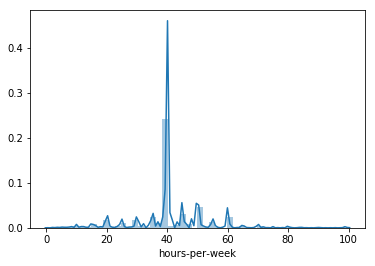

In [104]:
# Avaliando a distribuição das variáveis quantitativas

# Idade
#sns.distplot(df_1['age'].dropna())
df_1['age'].value_counts()

# Nível de escolaridade
#sns.distplot(df_1['education-num'].dropna())
df_1['education-num'].value_counts()

# Capital ganho
#sns.distplot(df_1['capital-gain'].dropna())
df_1['capital-gain'].value_counts()

# Capital perdido
#sns.distplot(df_1['capital-loss'].dropna())
df_1['capital-loss'].value_counts()

# Horas por semana
sns.distplot(df_1['hours-per-week'].dropna())
df_1['hours-per-week'].value_counts()

# Algumas questões importantes da análise:

# Quanto às variáveis capital ganho e perdido, há muitos registros zerados. Esses valores fazem sentido serem zerados?
# Se sim, esse valores podem representar um forte ponto de influência, o que prejudica o coeficiência angular
# da regressão

# Quanto à variável horas por semana, é aceitável que um dino possa trabalhar mais de 80 horas/semana? E 100? E 0?
# Se sim, os valores dessa variável estão Ok! Caso contrário, precisa-se estabelecer uma regra para análise

 Private             33307
 Self-emp-not-inc     3796
 Local-gov            3100
 State-gov            1946
 Self-emp-inc         1646
 Federal-gov          1406
 Without-pay            21
Name: workclass, dtype: int64

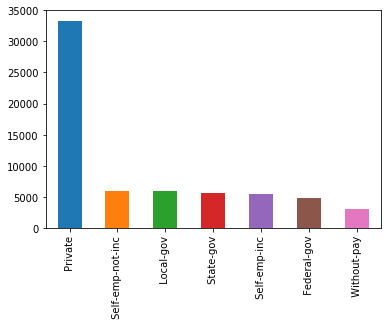

In [96]:
# Avaliando a distribuição das variáveis quanlitativas

df_1['occupation'].value_counts().plot.bar()
df_1['occupation'].value_counts()

df_1['workclass'].value_counts().plot.bar()
df_1['workclass'].value_counts()

# Algumas questões importantes da análise:

# Quanto às variáveis classe de trabalho, há 21 registro de dinos "Without-pay". Esses pontos podem representar
# overfitting para o modelo, apesar da baixa quantidade. Analisar esse ponto durante o train

#sns.factorplot(x='workclass', y='education-num', data=df_1, col='occupation', kind='violin')

In [106]:
# O df_1 final ficou com as seguintes variáveis:

df_1[["age", "workclass", "education-num", "occupation", "capital-gain", "capital-loss", "hours-per-week"]]

# Dada o problema pelos técnicos (HCKT), no qual os valores zero de capital gain e loss representam inconsistência
# na base de dados, a exclusão dos registros zerados não era uma opção viável, uma vez que o número de registros
# zerados eram altos. Neste sentido, decidiu-se substituir os valores zerados. Uma técnica simples que pode ser
# utilizada é substituir os valores zerados pela mediana dos valores diferentes de 0. Diferentemente da média,
# a mediana tende a apresentar o ponto de simetria dos dados.

# Calculando a mediana em capital gain e loss com base nos valores que não estão zerados
mediana_cg = df_1[df_1['capital-gain'] != 0]['capital-gain'].median()
mediana_cl = df_1[df_1['capital-loss'] != 0]['capital-loss'].median()

# Inserindo a mediana no lugar dos valores de 0 em capital gain e loss
df_1['capital-gain'].replace(0, mediana_cg, inplace=True)
df_1['capital-loss'].replace(0, mediana_cl, inplace=True)

#### Avaliação da base de dados df_2 (acounts_dinos.csv)

In [111]:
df_2.head()
df_2.tail()
df_2.sample(10)
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83681 entries, 0 to 83680
Data columns (total 11 columns):
step              83681 non-null int64
type              83681 non-null object
amount            83681 non-null float64
nameOrig          83681 non-null object
oldbalanceOrg     83681 non-null float64
newbalanceOrig    83681 non-null float64
nameDest          83681 non-null object
oldbalanceDest    83681 non-null float64
newbalanceDest    83681 non-null float64
isFraud           83681 non-null int64
isFlaggedFraud    83681 non-null int64
dtypes: float64(5), int64(3), object(3)
memory usage: 7.0+ MB


### Questão número 2

Um passo importante na preparação dos dados para a utilização de Machine Learning é a realização da atividade de Engenharia de Características. Descreva os passos realizados para a obtenção de novas características e como as mesmas afetaram a acurácia do modelo. 

Caso julgue que o processo de Engenharia de Características seja desnecessário, explique o porquê.


In [ ]:
# Conhecer o range das ages x quantidade de dinos

# Os dinos que trabalham 0 horas ganham quanto? E os que trabalham 100?

### Questão número 3

Considerando o modelo desenvolvido na questão 3 do Notebook de Machine Learning, gere um CSV com base na classificação obtida no conjunto de teste (counts.csv). Este CSV deve conter apenas quais dinossauros podem ser considerados bons investidores para o Dinobank. 